In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np

In [21]:
bitki_indeksleri = pd.read_csv("/content/bitki_indeksleri.csv")

In [22]:
bitki_indeksleri.head()

,NDVI,EVI,SAVI,MNDWI,NDRE,PRI,CI
0,-0.250920,-0.291011,0.074433,0.017894,-0.793752,-0.630688,-0.662130
1,0.901429,0.816026,-0.796486,0.201681,0.805106,0.634135,-0.442819
2,0.463988,0.331548,-0.242474,-0.057979,0.010505,-0.093194,-0.645979
3,0.197317,0.139130,-0.130790,-0.064178,0.652915,0.625813,-0.822595
4,-0.687963,-0.518537,0.352578,0.098318,-0.359901,-0.281536,-0.758728


a.Tüm Veri Setinin Korelasyonu ve heatmap i

In [23]:
numeric_coloumns = bitki_indeksleri.select_dtypes(include=['number'])

In [24]:
correlation_matrix = numeric_coloumns.corr()

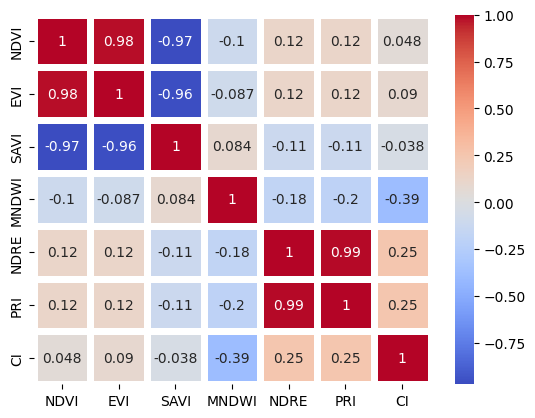

In [26]:
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidth=5)
plt.show()

b.Size Verilen Bağımlı ve Bağımsız Değişkeni Ayıklayınız.
Bağımsız değişken burada EVI dır.

In [27]:
bi = bitki_indeksleri.copy()
X = bi[["NDVI"]]
y = bi[["EVI"]]

c.Veri Setini %70 eğitim ve %30 test olarak ayır.

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

ç.Eğitim Veri Setini Kullanarak lineer bir regresör inşa edin.

In [29]:
from sklearn.linear_model import LinearRegression

In [38]:
lm = LinearRegression()

In [39]:
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [40]:


X = bi.NDVI.values.reshape(-1,1)
y = bi.EVI.values.reshape(-1,1)

lm.fit(X,y)

LinearRegression()

In [41]:
y_pred = lm.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


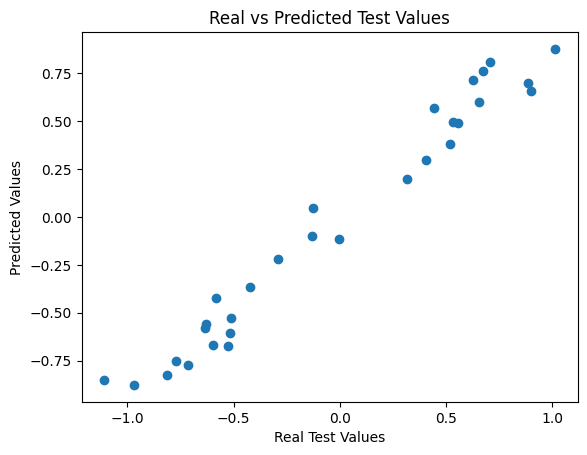

In [42]:
plt.scatter(y_test, y_pred)
plt.xlabel("Real Test Values")
plt.ylabel("Predicted Values")
plt.title("Real vs Predicted Test Values")
plt.show()

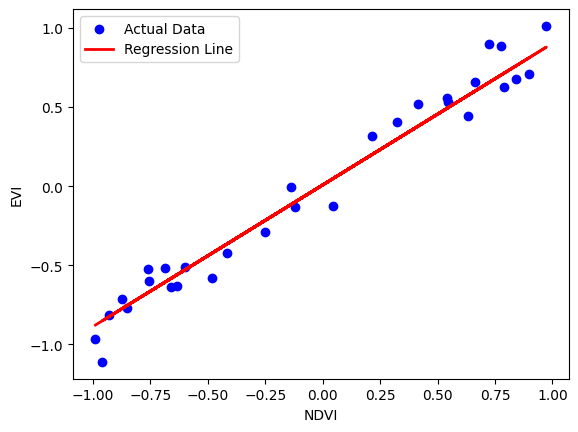

In [43]:
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('NDVI')
plt.ylabel('EVI')
plt.legend()
plt.show()